In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
# read data into memory
images= np.genfromtxt("hw02_data_set_images.csv", delimiter = ",")
labels= pd.read_csv("hw02_data_set_labels.csv", delimiter = ",",header = None).to_numpy()
labels_num = np.zeros((195,5))

for i in range(195):
    if labels[i] == 'A':
        labels_num[i] = np.array([1,0,0,0,0])
    elif labels[i] == 'B':
        labels_num[i] = np.array([0,1,0,0,0])
    elif labels[i] == 'C':
        labels_num[i] = np.array([0,0,1,0,0])
    elif labels[i] == 'D':
        labels_num[i] = np.array([0,0,0,1,0])
    elif labels[i] == 'E':
        labels_num[i] = np.array([0,0,0,0,1])


labels_num = labels_num.reshape((5,39,5))

images = images.reshape((39,5,320),order ='F')




In [4]:
images_training = np.zeros((125,320))
images_test = np.zeros((70,320))
labels_training = np.zeros((125,5))
labels_test = np.zeros((70,5))


for i in range(5):
    labels_training[25*i:25*(i+1)] = labels_num[i][0:25]
    labels_test[14*i:14*(i+1)] = labels_num[i][25:39]

    images_training[25*i:25*(i+1)] = images[0:25,i,:]
    images_test[14*i:14*(i+1)] = images[25:39,i,:]
    

#number of classes 
K = 5
#number of samples per class
N = 25


In [5]:
#labels_training.shape = (125,5)
#labels_test.shape = (70, 5)
#images_test.shape = (70, 320)
#images_training.shape = (125, 320)
def sigmoid(X, W, w0):
    scores = 1/(1+ np.exp(-(np.matmul(X,W) + w0)))
    return scores

# define the gradient functions
def gradient_W(X, y_truth, y_predicted):
    return(np.asarray(
        [-np.sum(np.repeat(((y_truth[:,c] - y_predicted[:,c])*y_predicted[:,c]
                *(1 - y_predicted[:,c]))[:, None], X.shape[1], axis = 1) * X, axis = 0) for c in range(K)]).transpose())

def gradient_w0(Y_truth, Y_predicted):
    return (-np.sum((Y_truth - Y_predicted)*Y_predicted*(1-Y_predicted), axis = 0))
   


In [6]:
# set learning parameters
eta = 0.01
epsilon = 1e-3

In [7]:
# randomly initalize W and w0
np.random.seed(421)
W = np.random.uniform(low = -0.01, high = 0.01, size = (images_training.shape[1], K))
w0 = np.random.uniform(low = -0.01, high = 0.01, size = (1, K))
print(W)
print(w0)

[[ 0.00365564  0.00606622 -0.0088745   0.00976955 -0.00594956]
 [-0.00777863 -0.00334092  0.00485218 -0.00185243 -0.00740226]
 [-0.00540071  0.00437433  0.00688369  0.00856865  0.00319291]
 ...
 [ 0.00918161 -0.00932138 -0.00376709 -0.00545653  0.00271732]
 [-0.00716311  0.00238298 -0.00950264 -0.00913239  0.00579071]
 [-0.00207441  0.00708117  0.00684862  0.00220557 -0.00297269]]
[[ 0.00432565 -0.00494613 -0.00607181 -0.00938394 -0.00737825]]


In [8]:
# learn W and w0 using gradient descent
iteration = 1
objective_values = []
while 1:
    labels_predicted = sigmoid(images_training, W, w0)
    error = (1/2)*np.sum((labels_training -labels_predicted)**2)
    objective_values = np.append(objective_values, error)

    W_old = W
    w0_old = w0

    W = W - eta * gradient_W(images_training, labels_training, labels_predicted)
    w0 = w0 - eta * gradient_w0(labels_training, labels_predicted)

    if np.sqrt(np.sum((w0 - w0_old))**2 + np.sum((W - W_old)**2)) < epsilon:
        break

    iteration = iteration + 1


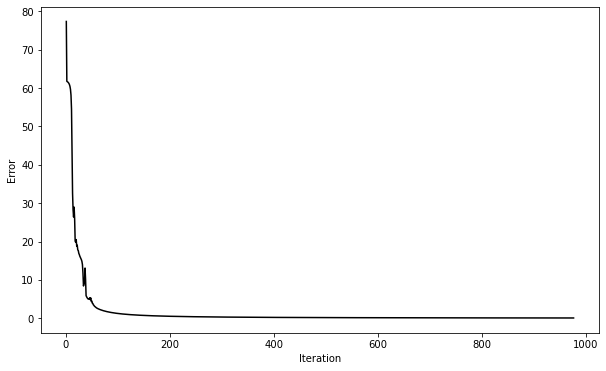

In [9]:
# plot objective function during iterations
plt.figure(figsize = (10, 6))
plt.plot(range(1, iteration + 1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()



In [10]:

#prediction function for particular image returns prediction class 
def pred(x):
    
    return np.argmax(sigmoid(x,W,w0), axis=1)



# calculate confusion matrix
y_predicted = np.argmax(labels_predicted, axis =1)
#conversion from one hot to 1-dim array
y_truth = np.argmax(labels_training, axis = 1) 
print("y_train_predicted")
confusion_matrix = pd.crosstab(y_truth, y_predicted,rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)


y_train_predicted
y_truth   0   1   2   3   4
y_pred                     
0        25   0   0   0   0
1         0  25   0   0   0
2         0   0  25   0   0
3         0   0   0  25   0
4         0   0   0   0  25


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [10]:
print("y_test_predicted")
test_pred = pred(images_test)
test_truth = np.argmax(labels_test, axis= 1)
confusion_matrix_test = pd.crosstab(test_truth,test_pred,rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix_test)

y_test_predicted
y_truth   0   1   2   3   4
y_pred                     
0        13   1   0   0   0
1         1  11   0   1   1
2         0   0  14   0   0
3         0   0   0  14   0
4         0   2   0   0  12
